<h1>Desafío Brain Food, Kevin Gajardo Gutiérrez</h1>

## 1.0 Análisis del contexto


Una empresa distribuidora de productos agrícolas enfrenta un problema de exceso de inventario. Actualmente tienen un modelo que no predice correctamente debido a la situación actual. El modelo determina la cantidad de inventario a comprar, la cual debe ser realizada con un mes de anticipación.

El objetivo es desarrollar un nuevo modelo que permita proyectar la demanda de manera más precisa.

**Plan de trabajo**:

>Enfoque: Comprender todo el enterno de los productos agrícolas y determinar posibles características de utilidad con la finalidad de obtener un modelo robusto y preciso.

>Tareas esenciales:
>>Revisión a profundidad del dataset en búsqueda de capturar información general que sea valiosa
>>
>>Incorporación de nuevas columnas que otorguen una mayor flexibilidad y comprensión de las correlaciones.
>>
>>Normalización para garantizar un rendimiento adecuado en el entrenamiento.
>>
>>Selección del modelo y validación
>>
>>Proceso comparativo en torno al beneficio monetario
>>
>>Observaciones generales

>Elementos a desarrollar:
>>Análisis de datos
>>
>>Selección de características
>>
>>Preprocesamiento de datos
>>
>>Construcción del modelo
>>
>>Validación del modelo
>>
>>Métricas de evaluación

>Fases y estimaciones de tiempo:
>>Estudiar el Dataset: 3hrs
>>
>>Preprocesamiento del dataset: 5hrs
>>
>>Construcción y entrenamiento del modelo: 3hr
>>
>>Validación del modelo: 1hr
>>
>>Conclusiones: 2hrs 


## 1.1 Análisis del dataset

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('desafio_modelo_de_demanda.csv')
df.head(5)

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2017-01-01,0,6651.737920,1786.0,1943.551087
1,2017-02-01,0,4919.698602,2194.0,1853.111850
2,2017-03-01,0,3277.484704,1178.0,1659.733052
3,2017-04-01,0,5906.864332,1010.0,1580.492875
4,2017-05-01,0,4662.644018,1327.0,1552.062093


In [3]:
df.describe()

,prod_id,precio_promedio,ventas,modelo_actual
count,80748.000000,80748.000000,80748.000000,80748.000000
mean,498.788379,5386.770862,1089.565958,1093.682259
std,290.397741,2893.919808,716.509618,507.905494
min,0.000000,606.335817,0.000000,0.000000
25%,248.000000,3018.438689,547.000000,713.346179
50%,494.000000,5079.052675,954.000000,1064.464617
75%,751.000000,7336.782635,1468.000000,1421.259490
max,999.000000,13978.011657,6404.000000,5397.308408


Existen **80748 muestras** en total con **1000 productos únicos**. ¿Qué sucede con las ventas en cero?

In [4]:
df[df['ventas']==0]

,fecha,prod_id,precio_promedio,ventas,modelo_actual
6275,2023-12-01,75,3033.560554,0.0,306.980344
20688,2018-01-01,255,1987.359915,0.0,0.000000
30380,2017-09-01,375,10957.041278,0.0,392.024755
30389,2018-06-01,375,5516.191966,0.0,461.585903
30577,2016-02-01,377,6755.874756,0.0,863.494071
53014,2014-11-01,659,8844.173096,0.0,207.016946
53593,2020-02-01,665,2562.478821,0.0,908.616971
54058,2021-11-01,671,9417.671354,0.0,1469.015932
61687,2020-08-01,766,950.134383,0.0,453.945255
66404,2019-09-01,825,4553.617944,0.0,353.254971


Al observar que el modelo_actual predice las ventas 0 al menos una vez, indica que el dataset se encuentra sin errores, se decide permanecer con los datos.

In [5]:
df[df['prod_id']==75]

,fecha,prod_id,precio_promedio,ventas,modelo_actual
6168,2015-01-01,75,4073.295680,1786.0,1948.963529
6169,2015-02-01,75,4053.766124,1210.0,1630.559662
6170,2015-03-01,75,3753.896767,311.0,1163.198293
6171,2015-04-01,75,4084.329865,307.0,848.449315
6172,2015-05-01,75,2258.433282,281.0,534.947499
...,...,...,...,...,...
6271,2023-08-01,75,2727.493471,580.0,410.769939
6272,2023-09-01,75,4290.569217,306.0,370.606471
6273,2023-10-01,75,2894.776527,555.0,471.232512
6274,2023-11-01,75,3699.881637,285.0,403.258942


In [6]:
df[df['prod_id']==843]

,fecha,prod_id,precio_promedio,ventas,modelo_actual
68016,2015-01-01,843,2207.078739,1272.0,1163.582099
68017,2015-02-01,843,3293.111792,53.0,699.718147
68018,2015-03-01,843,2581.090519,654.0,707.081236
68019,2015-04-01,843,2085.893601,247.0,592.273532
68020,2015-05-01,843,2609.763608,807.0,482.061843
...,...,...,...,...,...
68119,2023-08-01,843,2746.897646,894.0,945.524718
68120,2023-09-01,843,3459.037826,197.0,801.637417
68121,2023-10-01,843,2924.096503,506.0,804.412046
68122,2023-11-01,843,3528.153834,528.0,512.401081


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80748 entries, 0 to 80747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            80748 non-null  object 
 1   prod_id          80748 non-null  int64  
 2   precio_promedio  80748 non-null  float64
 3   ventas           80748 non-null  float64
 4   modelo_actual    80748 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
df.isnull().sum()

fecha              0
prod_id            0
precio_promedio    0
ventas             0
modelo_actual      0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(80748, 5)

No existen nulos ni duplicados. Respecto a los tipos de datos solamente la columna 'fecha' no es una variable numérica, sin embargo, se extraerá el año y mes cuando se prepare la información para el entrenamiento.

In [10]:
df_cantidades = df['prod_id'].value_counts().reset_index()
df_cantidades.head(-3)

,prod_id,count
0,750,144
1,507,144
2,813,144
3,176,144
4,430,144
...,...,...
992,718,12
993,257,12
994,683,12
995,668,12


A continuación se muestra la **distribución de los datos**

In [11]:
import matplotlib.pyplot as plt

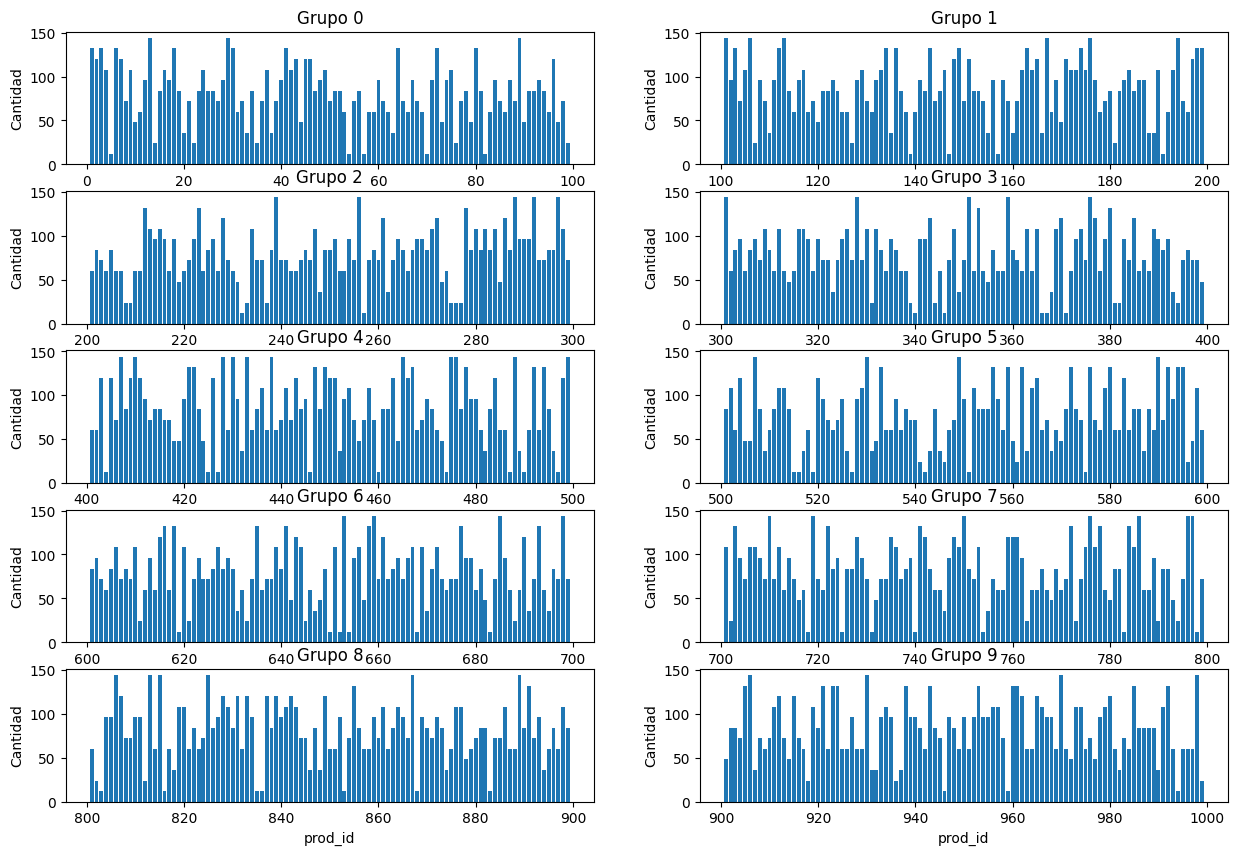

In [12]:

plt.figure(figsize=(15, 10))
for i in range(10):
  plt.subplot(5, 2, i + 1)
  data_subset = df_cantidades[(df_cantidades['prod_id'] < 100+i*100) & (0+i*100 < df_cantidades['prod_id'])]
  plt.bar(data_subset['prod_id'], data_subset['count'])
  plt.xlabel('prod_id')
  plt.ylabel('Cantidad')
  plt.title(f'Grupo {i}')

Todos son multiplos de 12, ya que no es posible agregar nuevas "ventas", se duplicarán los registros más bajos para balancear los datos.

In [13]:
df_exp = df.copy()
df_exp = pd.merge(df_exp, df_cantidades[['prod_id', 'count']], on='prod_id', how='left')
df_exp['fecha']=pd.to_datetime(df['fecha'])
df_exp['año']=df_exp['fecha'].dt.year
df_exp['mes']=df_exp['fecha'].dt.month
df_exp.head()

,fecha,prod_id,precio_promedio,ventas,modelo_actual,count,año,mes
0,2017-01-01,0,6651.737920,1786.0,1943.551087,84,2017,1
1,2017-02-01,0,4919.698602,2194.0,1853.111850,84,2017,2
2,2017-03-01,0,3277.484704,1178.0,1659.733052,84,2017,3
3,2017-04-01,0,5906.864332,1010.0,1580.492875,84,2017,4
4,2017-05-01,0,4662.644018,1327.0,1552.062093,84,2017,5


In [14]:
cantidad_objetivo=144
df_oversampled=pd.DataFrame()
id_obje=df_exp[df_exp['count']<cantidad_objetivo]['prod_id']
df_obj = df_exp[df_exp['prod_id'].isin(id_obje)]
multi=cantidad_objetivo //df_obj['count']
replicated_records = df_obj.loc[df_obj.index.repeat(multi)]
replicated_records['count'] *= multi
df_oversampled = pd.concat([df_oversampled, replicated_records], ignore_index=True)
df_exp = df_exp[~df_exp['prod_id'].isin(id_obje)]
df_oversampled = pd.concat([df_exp, df_oversampled], ignore_index=True)

#df_oversampled[df_oversampled['prod_id']==654]

In [15]:
df_oversampled[df_oversampled['prod_id']==201]

,fecha,prod_id,precio_promedio,ventas,modelo_actual,count,año,mes
30792,2019-01-01,201,7933.850023,886.0,818.344307,120,2019,1
30793,2019-01-01,201,7933.850023,886.0,818.344307,120,2019,1
30794,2019-02-01,201,7551.483615,1642.0,1221.170048,120,2019,2
30795,2019-02-01,201,7551.483615,1642.0,1221.170048,120,2019,2
30796,2019-03-01,201,8068.330142,1762.0,1508.852828,120,2019,3
...,...,...,...,...,...,...,...,...
30907,2023-10-01,201,10734.030650,1664.0,1730.564804,120,2023,10
30908,2023-11-01,201,11549.848271,1227.0,1375.979959,120,2023,11
30909,2023-11-01,201,11549.848271,1227.0,1375.979959,120,2023,11
30910,2023-12-01,201,9632.913947,985.0,1193.768562,120,2023,12


In [16]:
print(f'Cantidad de muestras iniciales: {df.shape[0]}')
print(f'Cantidad de muestras finales: {df_oversampled.shape[0]}')
print(f'Cantidad de nuevas muestras duplicadas: {df_oversampled.shape[0]-df.shape[0]}')

Cantidad de muestras iniciales: 80748
Cantidad de muestras finales: 121128
Cantidad de nuevas muestras duplicadas: 40380


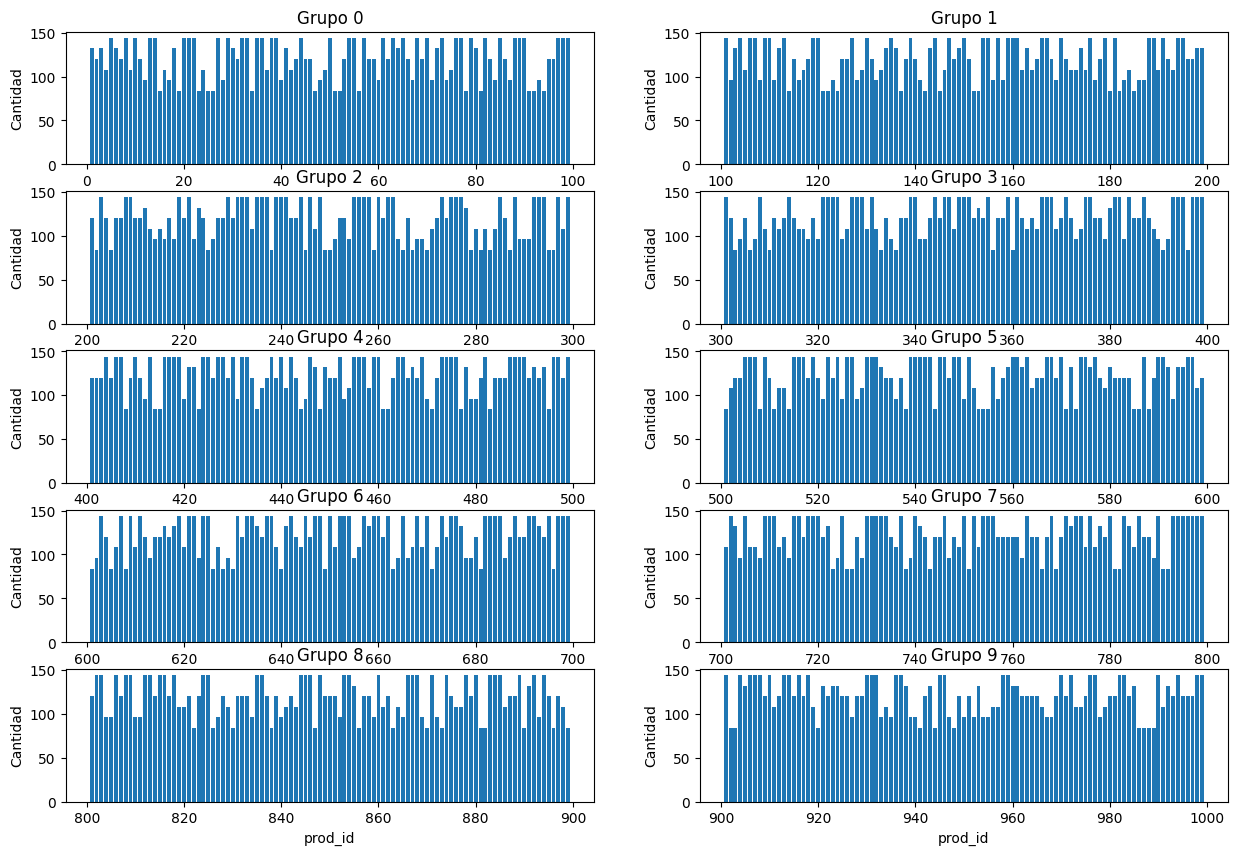

In [17]:
df_cantidades = df_oversampled['prod_id'].value_counts().reset_index()
plt.figure(figsize=(15, 10))
for i in range(10):
  plt.subplot(5, 2, i + 1)
  data_subset = df_cantidades[(df_cantidades['prod_id'] < 100+i*100) & (0+i*100 < df_cantidades['prod_id'])]
  plt.bar(data_subset['prod_id'], data_subset['count'])
  plt.xlabel('prod_id')
  plt.ylabel('Cantidad')
  plt.title(f'Grupo {i}')

In [18]:
df_aux=df_cantidades['count'].value_counts()
df_aux = pd.DataFrame({'count': df_aux.index, 'frequency': df_aux.values})
df_aux.head(20)

,count,frequency
0,144,374
1,120,215
2,84,133
3,96,113
4,108,97
5,132,68


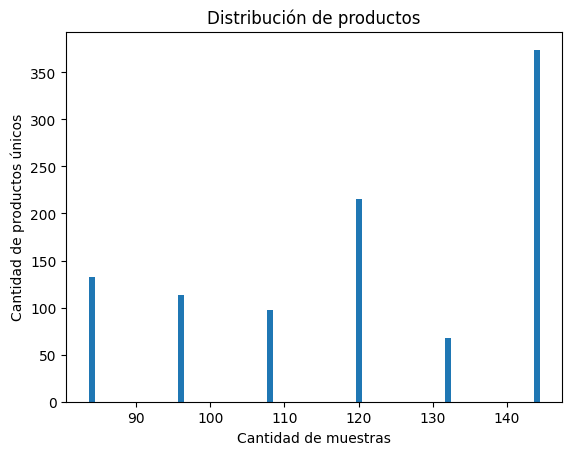

In [19]:
plt.bar(df_aux['count'], df_aux['frequency'])
plt.xlabel('Cantidad de muestras')
plt.ylabel('Cantidad de productos únicos')
plt.title('Distribución de productos')
plt.show()

Ahora se cuenta con un dataset más balanceado, no es ideal, pero ya se puede trabajar.

## 1.2 Preprocesamiento del dataset

Como se mencionó anteriormente, en esta sección se va a incorporar nuevas columnas en relación a las estaciones y a la pandemia.

In [20]:
df_processing = df_oversampled.copy()

In [21]:
df_processing['fecha']=pd.to_datetime(df['fecha'])
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121128 entries, 0 to 121127
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   fecha            80748 non-null   datetime64[ns]
 1   prod_id          121128 non-null  int64         
 2   precio_promedio  121128 non-null  float64       
 3   ventas           121128 non-null  float64       
 4   modelo_actual    121128 non-null  float64       
 5   count            121128 non-null  int64         
 6   año              121128 non-null  int32         
 7   mes              121128 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2)
memory usage: 6.5 MB


Los periodos de cada estación son los siguientes: Primavera (21/09 a 21/12), Verano (21/12 a 21/03), Otoño (21/03 a 21/06) e inverno (21/06 a 21/09)

Dado que las fechas en el dataset son registradas el día 1 de cada mes, se asume por simplicidad que si una estación comienza un día 21, se reconocerá que su inicio es al mes siguente, en caso contrario, si termina un día 21 es equivalente a permanecer el mes completo.

In [22]:
import numpy as np

In [23]:
#df_processing['año']=df_processing['fecha'].dt.year
#df_processing['mes']=df_processing['fecha'].dt.month
df_processing['verano']=np.where(
    (df_processing['fecha'].dt.month >= 1) & (df_processing['fecha'].dt.month <= 3),
    1,
    0
)
df_processing['otoño']=np.where(
    (df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6),
    1,
    0
)
df_processing['invierno']=np.where(
    (df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9),
    1,
    0
)
df_processing['primavera']=np.where(
    (df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12),
    1,
    0
)
df_processing.head(20)

,fecha,prod_id,precio_promedio,ventas,modelo_actual,count,año,mes,verano,otoño,invierno,primavera
0,2017-01-01,13,7877.697279,1528.0,1404.605626,144,2012,1,1,0,0,0
1,2017-02-01,13,6331.030267,1347.0,1568.993292,144,2012,2,1,0,0,0
2,2017-03-01,13,10502.628861,859.0,1334.859237,144,2012,3,1,0,0,0
3,2017-04-01,13,5962.211099,552.0,1035.805365,144,2012,4,0,1,0,0
4,2017-05-01,13,4886.173922,2116.0,1150.314206,144,2012,5,0,1,0,0
5,2017-06-01,13,7425.212532,1013.0,1190.632906,144,2012,6,0,1,0,0
6,2017-07-01,13,9910.604836,426.0,989.759952,144,2012,7,0,0,1,0
7,2017-08-01,13,9479.033230,886.0,1080.195964,144,2012,8,0,0,1,0
8,2017-09-01,13,7392.702836,1027.0,832.797129,144,2012,9,0,0,1,0
9,2017-10-01,13,6596.584569,1731.0,1066.717073,144,2012,10,0,0,0,1


Por otro lado, el periodo de pandemia se establece de acuerdo al primer caso en Chile hasta el fin de la alerta sanitaria (03/2020 a 08/2023)

In [24]:
df_processing['pandemia']=np.where(
    ((df_processing['fecha'].dt.month >= 3) & (df_processing['fecha'].dt.year == 2020)) |
    ((df_processing['fecha'].dt.year >= 2021) & (df_processing['fecha'].dt.year <= 2022)) |
    ((df_processing['fecha'].dt.month <= 8) & (df_processing['fecha'].dt.year == 2023)),
    1,
    0
)
df_processing.head(83)

,fecha,prod_id,precio_promedio,ventas,modelo_actual,count,año,mes,verano,otoño,invierno,primavera,pandemia
0,2017-01-01,13,7877.697279,1528.0,1404.605626,144,2012,1,1,0,0,0,0
1,2017-02-01,13,6331.030267,1347.0,1568.993292,144,2012,2,1,0,0,0,0
2,2017-03-01,13,10502.628861,859.0,1334.859237,144,2012,3,1,0,0,0,0
3,2017-04-01,13,5962.211099,552.0,1035.805365,144,2012,4,0,1,0,0,0
4,2017-05-01,13,4886.173922,2116.0,1150.314206,144,2012,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2023-07-01,13,9729.076464,921.0,1131.681075,144,2018,7,0,0,1,0,1
79,2023-08-01,13,5609.742945,1143.0,1065.290940,144,2018,8,0,0,1,0,1
80,2023-09-01,13,9758.777880,1179.0,1118.702079,144,2018,9,0,0,1,0,0
81,2023-10-01,13,8519.611359,936.0,1038.653478,144,2018,10,0,0,0,1,0


Según lo explicitado por ProChile Dirección de Promoción de Exportaciones de Chile, una institución gubernamental encargada de promover las exportaciones de bienes y servicios chilenos en mercados internacionales:

"El sector agroalimentario chileno es uno de los más dinámicos de la economía nacional, por su aporte al PIB, el que se estima alrededor del 4,7%. Este sector genera alrededor de 368.316 empleos directos en el país." 

*Fuente:* https://www.prochile.gob.cl/sectores-exportadores/agro-y-alimentos

Variedad de productos agrícolas en Chile:

https://www.ine.gob.cl/docs/default-source/siembra_y_cosecha/publicaciones-y-anuarios/s%C3%ADntesis-agropecuaria/s%C3%ADntesis-agropecuaria---encuestas-intercensales-agropecuarias-2022-2023.pdf?sfvrsn=b1afe117_5


Se asume que la venta es complemante interna, es decir que no se importan productos, y que tampoco las ventas están concentradas en una región determinada (análisis realizado en la última sección de **observaciones**)

La última información que podemos incorporar es el **Índice de Precios al Consumidor (IPC)**, el cual representa el costo de un conjunto de bienes y servicios habituales para la población. Por otro lado para captar la capacidad de pago de la población es posible incorporar la **tasa de ocupación** de forma trimestral.

*Fuentes:* https://www.ine.gob.cl/estadisticas/economia/indices-de-precio-e-inflacion/indice-de-precios-al-consumidor
           https://www.ine.gob.cl/estadisticas/sociales/mercado-laboral/ocupacion-y-desocupacion

In [25]:
values_year = {
    (2012, 1): 81.87, (2012, 2): 82.19, (2012, 3): 82.33, (2012, 4): 82.37, (2012, 5): 82.39, (2012, 6): 82.15,
    (2012, 7): 82.14, (2012, 8): 82.32, (2012, 9): 82.95, (2012, 10): 83.42, (2012, 11): 83.04, (2012, 12): 83.02,
    (2013, 1): 83.17, (2013, 2): 83.26, (2013, 3): 83.58, (2013, 4): 83.18, (2013, 5): 83.17, (2013, 6): 83.7,
    (2013, 7): 83.92, (2013, 8): 84.12, (2013, 9): 84.58, (2013, 10): 84.7, (2013, 11): 85.01, (2013, 12): 85.52,
    (2014, 1): 85.67, (2014, 2): 86.09, (2014, 3): 86.81, (2014, 4): 87.35, (2014, 5): 87.65, (2014, 6): 87.69,
    (2014, 7): 87.9, (2014, 8): 88.18, (2014, 9): 88.92, (2014, 10): 89.84, (2014, 11): 89.87, (2014, 12): 89.5,
    (2015, 1): 89.56, (2015, 2): 89.88, (2015, 3): 90.44, (2015, 4): 90.97, (2015, 5): 91.13, (2015, 6): 91.57,
    (2015, 7): 91.95, (2015, 8): 92.58, (2015, 9): 93.05, (2015, 10): 93.43, (2015, 11): 93.4, (2015, 12): 93.41,
    (2016, 1): 93.85, (2016, 2): 94.11, (2016, 3): 94.47, (2016, 4): 94.78, (2016, 5): 94.99, (2016, 6): 95.42,
    (2016, 7): 95.65, (2016, 8): 95.7, (2016, 9): 95.93, (2016, 10): 96.09, (2016, 11): 96.14, (2016, 12): 95.94,
    (2017, 1): 96.46, (2017, 2): 96.69, (2017, 3): 97.06, (2017, 4): 97.3, (2017, 5): 97.42, (2017, 6): 97.04,
    (2017, 7): 97.27, (2017, 8): 97.47, (2017, 9): 97.32, (2017, 10): 97.89, (2017, 11): 97.98, (2017, 12): 98.12,
    (2018, 1): 98.57, (2018, 2): 98.62, (2018, 3): 98.82, (2018, 4): 99.13, (2018, 5): 99.41, (2018, 6): 99.51,
    (2018, 7): 99.86, (2018, 8): 100.04, (2018, 9): 100.38, (2018, 10): 100.74, (2018, 11): 100.74, (2018, 12): 100.64,
    (2019, 1): 100.75, (2019, 2): 100.79, (2019, 3): 101.27, (2019, 4): 101.54, (2019, 5): 102.15, (2019, 6): 102.2,
    (2019, 7): 102.43, (2019, 8): 102.62, (2019, 9): 102.63, (2019, 10): 103.47, (2019, 11): 103.55, (2019, 12): 103.66,
    (2020, 1): 104.24, (2020, 2): 104.71, (2020, 3): 105.06, (2020, 4): 105.01, (2020, 5): 104.96, (2020, 6): 104.89,
    (2020, 7): 104.99, (2020, 8): 105.13, (2020, 9): 105.8, (2020, 10): 106.52, (2020, 11): 106.38, (2020, 12): 106.74,
    (2021, 1): 107.49, (2021, 2): 107.69, (2021, 3): 108.09, (2021, 4): 108.5, (2021, 5): 108.79, (2021, 6): 108.88,
    (2021, 7): 109.76, (2021, 8): 110.15, (2021, 9): 111.45, (2021, 10): 112.94, (2021, 11): 113.51, (2021, 12): 114.39,
    (2022, 1): 115.77, (2022, 2): 116.1, (2022, 3): 118.26, (2022, 4): 119.91, (2022, 5): 121.35, (2022, 6): 122.48,
    (2022, 7): 124.16, (2022, 8): 125.67, (2022, 9): 126.75, (2022, 10): 127.41, (2022, 11): 128.65, (2022, 12): 129.02,
    (2023, 1): 130.05, (2023, 2): 129.97, (2023, 3): 131.38, (2023, 4): 131.79, (2023, 5): 131.94, (2023, 6): 131.74,
    (2023, 7): 132.2, (2023, 8): 132.35, (2023, 9): 133.24, (2023, 10): 133.82, (2023, 11): 134.82, (2023, 12): 134.1
}


def ipc(fila):
    return values_year.get((fila['fecha'].year, fila['fecha'].month), 0)

df_processing['IPC'] = df_processing.apply(ipc, axis=1)
df_processing.head(13)

,fecha,prod_id,precio_promedio,ventas,modelo_actual,count,año,mes,verano,otoño,invierno,primavera,pandemia,IPC
0,2017-01-01,13,7877.697279,1528.0,1404.605626,144,2012,1,1,0,0,0,0,96.46
1,2017-02-01,13,6331.030267,1347.0,1568.993292,144,2012,2,1,0,0,0,0,96.69
2,2017-03-01,13,10502.628861,859.0,1334.859237,144,2012,3,1,0,0,0,0,97.06
3,2017-04-01,13,5962.211099,552.0,1035.805365,144,2012,4,0,1,0,0,0,97.30
4,2017-05-01,13,4886.173922,2116.0,1150.314206,144,2012,5,0,1,0,0,0,97.42
5,2017-06-01,13,7425.212532,1013.0,1190.632906,144,2012,6,0,1,0,0,0,97.04
6,2017-07-01,13,9910.604836,426.0,989.759952,144,2012,7,0,0,1,0,0,97.27
7,2017-08-01,13,9479.033230,886.0,1080.195964,144,2012,8,0,0,1,0,0,97.47
8,2017-09-01,13,7392.702836,1027.0,832.797129,144,2012,9,0,0,1,0,0,97.32
9,2017-10-01,13,6596.584569,1731.0,1066.717073,144,2012,10,0,0,0,1,0,97.89


In [26]:
condition_2012_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2012))
condition_2012_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2012))
condition_2012_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2012))
condition_2012_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2012))

condition_2013_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2013))
condition_2013_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2013))
condition_2013_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2013))
condition_2013_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2013))

condition_2014_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2014))
condition_2014_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2014))
condition_2014_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2014))
condition_2014_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2014))

condition_2015_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2015))
condition_2015_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2015))
condition_2015_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2015))
condition_2015_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2015))

condition_2016_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2016))
condition_2016_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2016))
condition_2016_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2016))
condition_2016_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2016))

condition_2017_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2017))
condition_2017_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2017))
condition_2017_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2017))
condition_2017_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2017))

condition_2018_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2018))
condition_2018_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2018))
condition_2018_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2018))
condition_2018_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2018))

condition_2019_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2019))
condition_2019_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2019))
condition_2019_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2019))
condition_2019_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2019))

condition_2020_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2020))
condition_2020_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2020))
condition_2020_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2020))
condition_2020_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2020))

condition_2021_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2021))
condition_2021_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2021))
condition_2021_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2021))
condition_2021_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2021))

condition_2022_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2022))
condition_2022_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2022))
condition_2022_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2022))
condition_2022_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2022))

condition_2023_t1 = ((df_processing['fecha'].dt.month <= 3) & (df_processing['fecha'].dt.year == 2023))
condition_2023_t2 = ((df_processing['fecha'].dt.month >= 4) & (df_processing['fecha'].dt.month <= 6) & (df_processing['fecha'].dt.year == 2023))
condition_2023_t3 = ((df_processing['fecha'].dt.month >= 7) & (df_processing['fecha'].dt.month <= 9) & (df_processing['fecha'].dt.year == 2023))
condition_2023_t4 = ((df_processing['fecha'].dt.month >= 10) & (df_processing['fecha'].dt.month <= 12) & (df_processing['fecha'].dt.year == 2023))

conditions = [
    condition_2012_t1, condition_2012_t2, condition_2012_t3, condition_2012_t4,
    condition_2013_t1, condition_2013_t2, condition_2013_t3, condition_2013_t4,
    condition_2014_t1, condition_2014_t2, condition_2014_t3, condition_2014_t4,
    condition_2015_t1, condition_2015_t2, condition_2015_t3, condition_2015_t4,
    condition_2016_t1, condition_2016_t2, condition_2016_t3, condition_2016_t4,
    condition_2017_t1, condition_2017_t2, condition_2017_t3, condition_2017_t4,
    condition_2018_t1, condition_2018_t2, condition_2018_t3, condition_2018_t4,
    condition_2019_t1, condition_2019_t2, condition_2019_t3, condition_2019_t4,
    condition_2020_t1, condition_2020_t2, condition_2020_t3, condition_2020_t4,
    condition_2021_t1, condition_2021_t2, condition_2021_t3, condition_2021_t4,
    condition_2022_t1, condition_2022_t2, condition_2022_t3, condition_2022_t4,
    condition_2023_t1, condition_2023_t2, condition_2023_t3, condition_2023_t4,
]



values = [57.5,57.1,57.3,57.7,     #2012
          57.8,57.7,57.5,58.3,     #2013
          58.2,57.7,57.3,58.3,     #2014
          58,57.6,58.1,58.7,       #2015
          58.1,57.7,57.8,58.3,     #2016
          58,58,58.3,59,           #2017
          58.7,58.3,57.7,58.7,     #2018
          58.2,58.1,58.3,58.6,     #2019
          57.3,45.6,46.8,50.8,     #2020
          51.4,50.6,52.3,54.3,     #2021
          54.9,55,54.9,55.5,       #2022
          55.7,55.7,55.5,56.6]     #2023
df_processing['ocupacion'] = np.select(conditions, values, default=0)
df_processing.head(13)

,fecha,prod_id,precio_promedio,ventas,modelo_actual,count,año,mes,verano,otoño,invierno,primavera,pandemia,IPC,ocupacion
0,2017-01-01,13,7877.697279,1528.0,1404.605626,144,2012,1,1,0,0,0,0,96.46,58.0
1,2017-02-01,13,6331.030267,1347.0,1568.993292,144,2012,2,1,0,0,0,0,96.69,58.0
2,2017-03-01,13,10502.628861,859.0,1334.859237,144,2012,3,1,0,0,0,0,97.06,58.0
3,2017-04-01,13,5962.211099,552.0,1035.805365,144,2012,4,0,1,0,0,0,97.30,58.0
4,2017-05-01,13,4886.173922,2116.0,1150.314206,144,2012,5,0,1,0,0,0,97.42,58.0
5,2017-06-01,13,7425.212532,1013.0,1190.632906,144,2012,6,0,1,0,0,0,97.04,58.0
6,2017-07-01,13,9910.604836,426.0,989.759952,144,2012,7,0,0,1,0,0,97.27,58.3
7,2017-08-01,13,9479.033230,886.0,1080.195964,144,2012,8,0,0,1,0,0,97.47,58.3
8,2017-09-01,13,7392.702836,1027.0,832.797129,144,2012,9,0,0,1,0,0,97.32,58.3
9,2017-10-01,13,6596.584569,1731.0,1066.717073,144,2012,10,0,0,0,1,0,97.89,59.0


Finalmente veremos las correlaciones de las variables que existen hasta ahora

In [27]:

x_corr=df_processing.drop('fecha', axis=1,inplace=False)
x_corr.drop('count', axis=1,inplace=True)
x_corr=x_corr.drop('modelo_actual', axis=1,inplace=False)
x_corr.head()

,prod_id,precio_promedio,ventas,año,mes,verano,otoño,invierno,primavera,pandemia,IPC,ocupacion
0,13,7877.697279,1528.0,2012,1,1,0,0,0,0,96.46,58.0
1,13,6331.030267,1347.0,2012,2,1,0,0,0,0,96.69,58.0
2,13,10502.628861,859.0,2012,3,1,0,0,0,0,97.06,58.0
3,13,5962.211099,552.0,2012,4,0,1,0,0,0,97.30,58.0
4,13,4886.173922,2116.0,2012,5,0,1,0,0,0,97.42,58.0


In [28]:

x_corr.describe()

,prod_id,precio_promedio,ventas,año,mes,verano,otoño,invierno,primavera,pandemia,IPC,ocupacion
count,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000
mean,500.291857,5374.838679,1071.661928,2018.276798,6.500000,0.166658,0.166658,0.166658,0.166658,0.244089,69.743957,37.374517
std,287.577412,2893.389673,708.025296,3.011657,3.452067,0.372672,0.372672,0.372672,0.372672,0.429547,50.503179,26.568782
min,0.000000,606.335817,0.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,251.000000,3011.505616,537.000000,2016.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,502.000000,5075.184943,935.000000,2019.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,96.140000,55.000000
75%,748.000000,7321.236946,1444.000000,2021.000000,9.250000,0.000000,0.000000,0.000000,0.000000,0.000000,104.990000,58.000000
max,999.000000,13978.011657,6404.000000,2023.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,134.820000,59.000000


([<matplotlib.axis.YTick at 0x7feb8ce2d8d0>,
 [Text(0, 0.5, 'prod_id'),
  Text(0, 1.5, 'precio_promedio'),
  Text(0, 2.5, 'ventas'),
  Text(0, 3.5, 'año'),
  Text(0, 4.5, 'mes'),
  Text(0, 5.5, 'verano'),
  Text(0, 6.5, 'otoño'),
  Text(0, 7.5, 'invierno'),
  Text(0, 8.5, 'primavera'),
  Text(0, 9.5, 'pandemia'),
  Text(0, 10.5, 'IPC'),
  Text(0, 11.5, 'ocupacion')])

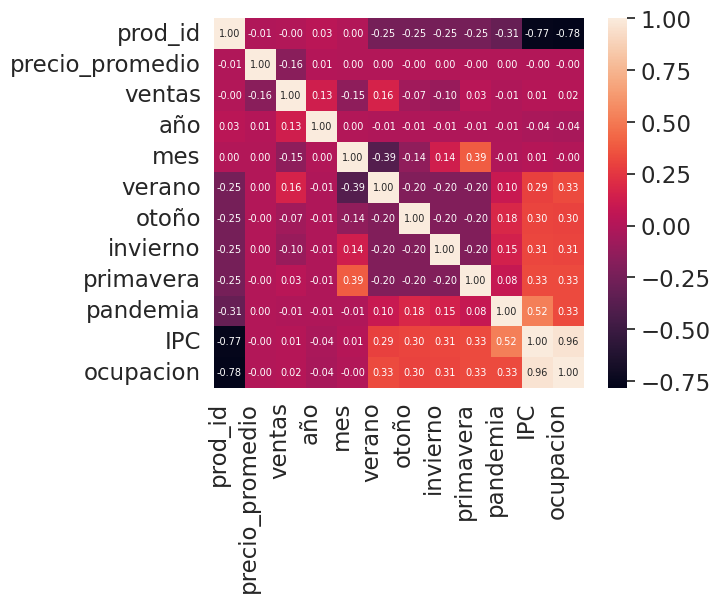

In [29]:
cm = np.corrcoef(x_corr[x_corr.columns].values.T);
import seaborn as sns
sns.set(style='whitegrid', context='notebook',font_scale=1.5)
cl=['prod_id','precio_promedio','ventas','año','mes','verano','otoño','invierno','primavera','pandemia','IPC','ocupacion']
cl2=['id','p_p','v','a','m','ve','ot','in','pr','pa']
hm=sns.heatmap(cm,cbar=True,annot=True, square=True,fmt='.2f',annot_kws={'size':7})
hm.set_xticklabels(cl, rotation=90, ha='right')
plt.yticks(np.arange(len(cl)) + 0.5, cl, rotation=0)

Las estaciones otorgaron un resultado esperado, ya que en verano y primavera se tiene una mayor venta en comparación al otoño e invierno.

# 2.0 Selección y entrenamiento del modelo

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
X=df_processing[['fecha','prod_id','precio_promedio','mes','verano','otoño','invierno','primavera','pandemia','IPC','ocupacion','modelo_actual']].values
Y=df_processing[['ventas']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=df_processing['prod_id'], random_state=0)
data_test_x_demanda=X_test.copy()
data_test_y_demanda=Y_test.copy()
X_train = np.delete(X_train, 11, axis=1)
X_test = np.delete(X_test, 11, axis=1)
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)

Se requiere normalizar los datos a entrenar, se utilizará StandardScaler en torno a la media y desvación estándar con la finalidad de evitar que ciertas características con valores numéricos altos tengan un peso considerable en el entrenamiento, además de garantizar la convergencia y rendimiento del entrenamiento.


In [32]:
sc_x=StandardScaler().fit(X_train)
sc_y=StandardScaler().fit(Y_train)

X_std=sc_x.transform(X_train)
Y_std=sc_y.transform(Y_train)

sc_x_test=StandardScaler().fit(X_test)
sc_y_test=StandardScaler().fit(Y_test)

X_stdt=sc_x_test.transform(X_test)
Y_stdt=sc_y_test.transform(Y_test)

In [33]:
df_processing.describe()

,fecha,prod_id,precio_promedio,ventas,modelo_actual,count,año,mes,verano,otoño,invierno,primavera,pandemia,IPC,ocupacion
count,80748,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000,121128.000000
mean,2019-01-22 09:28:48.577797376,500.291857,5374.838679,1071.661928,1080.433430,125.052506,2018.276798,6.500000,0.166658,0.166658,0.166658,0.166658,0.244089,69.743957,37.374517
min,2012-01-01 00:00:00,0.000000,606.335817,0.000000,0.000000,84.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-12-01 00:00:00,251.000000,3011.505616,537.000000,699.011924,108.000000,2016.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-04-01 00:00:00,502.000000,5075.184943,935.000000,1046.995493,132.000000,2019.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,96.140000,55.000000
75%,2021-06-01 00:00:00,748.000000,7321.236946,1444.000000,1403.092249,144.000000,2021.000000,9.250000,0.000000,0.000000,0.000000,0.000000,0.000000,104.990000,58.000000
max,2023-12-01 00:00:00,999.000000,13978.011657,6404.000000,5397.308408,144.000000,2023.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,134.820000,59.000000
std,NaN,287.577412,2893.389673,708.025296,511.381353,20.611202,3.011657,3.452067,0.372672,0.372672,0.372672,0.372672,0.429547,50.503179,26.568782


A continuación se prueban los modelos de regresión lineal. random forest, gradient boosting regressor, y una red neuronal en sus formatos sencillos.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_lr = LinearRegression()
model_lr.fit(X_std, Y_std)
predictions_lr = model_lr.predict(X_stdt)
mse_lr = mean_squared_error(Y_stdt, predictions_lr)
r2_lr = r2_score(Y_stdt, predictions_lr)
print(f'MSE - RLM: {mse_lr}')
print(f'R2 Score - RLM: {r2_lr}')

MSE - RLM: 0.9246482786381678
R2 Score - RLM: 0.07535172136183221


In [35]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_std, Y_std.ravel())
predictions_rf = model_rf.predict(X_stdt)
mse_rf = mean_squared_error(Y_stdt, predictions_rf)
r2_rf = r2_score(Y_stdt, predictions_rf)
print(f'MSE - RFR {mse_rf}')
print(f'R2 Score - RRFR: {r2_rf}')

MSE - RFR 0.31722420444690425
R2 Score - RRFR: 0.6827757955530958


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar modelo
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=0)
model_gb.fit(X_std, Y_std.ravel())

# Hacer predicciones
predictions_gb = model_gb.predict(X_stdt)

# Evaluar rendimiento
mse_gb = mean_squared_error(Y_stdt, predictions_gb)
r2_gb = r2_score(Y_stdt, predictions_gb)

print(f'MSE - GBR: {mse_gb}')
print(f'R2 Score - GBR: {r2_gb}')


MSE - GBR: 0.6888865995692461
R2 Score - GBR: 0.31111340043075386


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler

model_nn = Sequential([
    Dense(10, activation='relu', input_shape=(X_std.shape[1],)),
    Dense(15, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='relu'),
    Dense(1,activation='linear')
])
model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_std, Y_std, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
predictions_nn = model_nn.predict(X_stdt)
mse_nn = mean_squared_error(Y_stdt, predictions_nn)
r2_nn = r2_score(Y_stdt, predictions_nn)

print(f'MSE - Red Neuronal: {mse_nn}')
print(f'R2 Score - Red Neuronal: {r2_nn}')


2024-02-17 15:02:24.561374: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 15:02:24.712265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 15:02:24.712313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 15:02:24.743857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 15:02:24.801995: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 15:02:24.803010: I tensorflow/core/platform/cpu_feature_guard.cc:1

758/758 [==============================] - 0s 366us/step
MSE - Red Neuronal: 0.7369182443152019
R2 Score - Red Neuronal: 0.2630817556847981


En base al R2 Score, el mejor modelo es random forest para este caso.

In [38]:
sc_y_test.inverse_transform(predictions_rf[31].reshape(-1, 1))

array([[1143.80603428]])

In [39]:
sc_y_test.inverse_transform(Y_stdt[31].reshape(-1, 1))

array([[1165.]])

# 3.0 Predicciones del 2024

Para predecir la demanda en el 2024, es necesario predecir el precio promedio independiente de las ventas, por ende se requiere de un modelo adicional:


In [40]:
X=df_processing[['prod_id','año','IPC','ocupacion','mes']].values
Y=df_processing[['precio_promedio']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=df_processing['prod_id'], random_state=0)
sc_x_precio=StandardScaler().fit(X_train)
sc_y_precio=StandardScaler().fit(Y_train)
X_std=sc_x_precio.transform(X_train)
Y_std=sc_y_precio.transform(Y_train)
sc_x_test_precio=StandardScaler().fit(X_test)
sc_y_test_precio=StandardScaler().fit(Y_test)
X_stdt=sc_x_test_precio.transform(X_test)
Y_stdt=sc_y_test_precio.transform(Y_test)


In [41]:
model_rf_precio = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf_precio.fit(X_std, Y_std.ravel())

predictions_rf_precio = model_rf_precio.predict(X_stdt)

mse_rf_precio = mean_squared_error(Y_stdt, predictions_rf_precio)
r2_rf_precio = r2_score(Y_stdt, predictions_rf_precio)

print(f'Mean Squared Error (MSE) - Random Forest Regression: {mse_rf_precio}')
print(f'R2 Score - Random Forest Regression: {r2_rf_precio}')

Mean Squared Error (MSE) - Random Forest Regression: 0.1811736405105596
R2 Score - Random Forest Regression: 0.8188263594894404


In [42]:
sc_y_test_precio.inverse_transform(predictions_rf_precio[31].reshape(-1, 1))

array([[8120.8632697]])

In [43]:
sc_y_test.inverse_transform(Y_stdt[31].reshape(-1, 1))

array([[1236.6130303]])

Considerando los factores año, ipc, ocupación y mes, es posible predecir el precio_promedio con una **proyección de 2 meses**, ya que requiere de actualizar los nuevos datos con la finalidad de captar la última tendencia, principalmente limitado por el comportamiento del IPC. Se utilizan los valores asociados al periodo de diciembre del 2023.

Cabe destacar que una proyección de 2 meses es adecuada al área, debido a que se puede tener una idea del comportamiento relativamente lejano.

In [44]:
entrada = np.array([[i, 2024, 134, 56.6, j] for i in range(1000) for j in range(1, 3)])
precios_2024=sc_y_test_precio.inverse_transform(model_rf_precio.predict(sc_x_test_precio.transform(entrada)).reshape(-1, 1))
precios_2024

array([[4858.8670385 ],
       [5272.46843735],
       [2330.22064415],
       ...,
       [8012.28851915],
       [8041.33189623],
       [7532.51413833]])

Se observa un valor elevado, al inspeccionar el dataframe original se concluye que es un valor adecuado.

In [45]:
df[df['prod_id']==998]

,fecha,prod_id,precio_promedio,ventas,modelo_actual
80580,2012-01-01,998,10554.620268,955.0,982.324816
80581,2012-02-01,998,11452.637321,1039.0,1055.230971
80582,2012-03-01,998,9287.956839,599.0,851.884063
80583,2012-04-01,998,9980.515771,605.0,752.608072
80584,2012-05-01,998,7975.140638,742.0,773.231454
...,...,...,...,...,...
80719,2023-08-01,998,12905.955323,535.0,464.894091
80720,2023-09-01,998,10690.792563,645.0,611.003111
80721,2023-10-01,998,11975.369686,456.0,600.803486
80722,2023-11-01,998,10963.791973,827.0,572.086823


Luego es posible realizar las predicciones asociadas a la demanda:

In [46]:
precios_2024[0]

array([4858.8670385])

In [47]:
entrada = []
aux=0
for i in range(1000):
    if (aux!=1999):
        entrada.append([i, precios_2024[aux][0], 1, 1, 0, 0, 0, 0, 134, 56.6])
        entrada.append([i, precios_2024[aux+1][0], 2, 1, 0, 0, 0, 0, 134, 56.6])
        aux=aux+2
    else:
        print('Fuera de rango')
entrada = np.array(entrada)
demanda_2024=sc_y_test.inverse_transform(model_rf.predict(sc_x_test.transform(entrada)).reshape(-1, 1))
demanda_2024

array([[2556.55362142],
       [2065.2636863 ],
       [1579.90501906],
       ...,
       [1898.72574757],
       [1838.69930594],
       [1538.54699178]])

Finalmente se genera la **tabla CSV**.



In [48]:
df_tabla = pd.DataFrame()

valores_m = [1, 2] * 1000
df_tabla['fecha'] = ["2024-{:02d}-01".format(m) for m in valores_m]
cantidad_productos = [range(1000)] * 2
cantidad_productos = [i for i in range(1000)]
df_tabla['prod_id'] = [val for val in cantidad_productos for _ in range(2)] 
df_tabla['prediccion_precio_promedio']=[precios_2024[i][0] for i in range(2000)]
df_tabla['prediccion_demanda']=[demanda_2024[i][0] for i in range (2000)]

df_tabla.head()

df_write = pd.DataFrame(df_tabla, columns=['fecha', 'prod_id', 'prediccion_precio_promedio', 'prediccion_demanda'])

df_write.to_csv('prediccion_demanda.csv', index=False)

# 4.0 Beneficios $ y mantenimiento del modelo en operación

Para determinar el beneficio es necesario comparar la predicción del test con el valor del "modelo_actual", lo cual fue guardado al momento previo a su normalización.

La métrica a utilizar será el error absoluto, determinando el promedio de las diferencias absolutas para los modelos. Esta expresa que tan alejados se encuentran las predicciones en promecio con el valor real, lo cual permitirá realizar una diferencia porcentual para explicitar el beneficio económico.

In [49]:
#X=df_processing[['fecha','prod_id','precio_promedio','mes','verano','otoño','invierno','primavera','pandemia','IPC','ocupacion','modelo_actual']].values
data_test_x_demanda.shape

(24226, 12)

In [50]:
data_test_y_demanda.shape #ventas

(24226, 1)

In [51]:
predictions_rf_beneficio=sc_y_test.inverse_transform(predictions_rf.reshape(-1, 1))
predictions_rf_beneficio.shape

(24226, 1)

In [52]:
aux = np.concatenate((data_test_x_demanda, data_test_y_demanda), axis=1)
aux = np.concatenate((aux, predictions_rf_beneficio), axis=1)
df_tabla_beneficio = pd.DataFrame(aux.reshape(-1, 14),columns=['fecha','prod_id','precio_promedio','mes','verano','otoño','invierno','primavera','pandemia','IPC','ocupacion','modelo_actual','ventas','nuevo_modelo'])
df_tabla_beneficio.head()

df_tabla_beneficio.drop('mes', axis=1,inplace=True)
df_tabla_beneficio.drop('verano', axis=1,inplace=True)
df_tabla_beneficio.drop('otoño', axis=1,inplace=True)
df_tabla_beneficio.drop('primavera', axis=1,inplace=True)
df_tabla_beneficio.drop('invierno', axis=1,inplace=True)
df_tabla_beneficio.drop('pandemia', axis=1,inplace=True)
df_tabla_beneficio.drop('IPC', axis=1,inplace=True)
df_tabla_beneficio.drop('ocupacion', axis=1,inplace=True)
df_tabla_beneficio.head(3)



,fecha,prod_id,precio_promedio,modelo_actual,ventas,nuevo_modelo
0,2017-01-01,338,6600.399963,1264.442392,2632.0,1794.275115
1,2018-03-01,158,8589.461183,1915.535541,141.0,1020.888047
2,2021-02-01,402,2329.959856,1387.272422,1140.0,1785.297789


Se agregan "perdida_nueva_inventario" y "perdida_antigua_inventario", representan la cantidad de inventario sobrante que no se logró vender, en caso de que la venta sea mayor a la demanda se asume que no es una pérdida (corresponde a una oportunidad pérdida)

In [53]:

nueva_dif = abs(df_tabla_beneficio['nuevo_modelo']-df_tabla_beneficio['ventas'])
antigua_dif = abs(df_tabla_beneficio['modelo_actual']-df_tabla_beneficio['ventas'])
nueva_dif.shape
df_tabla_beneficio['perdida_nueva_inventario'] = np.maximum(df_tabla_beneficio['nuevo_modelo'] - df_tabla_beneficio['ventas'], 0)
df_tabla_beneficio['perdida_antigua_inventario'] = np.maximum(df_tabla_beneficio['modelo_actual'] - df_tabla_beneficio['ventas'], 0)
df_tabla_beneficio.to_csv('beneficio_economico.csv', index=False)
df_tabla_beneficio.head(5)

,fecha,prod_id,precio_promedio,modelo_actual,ventas,nuevo_modelo,perdida_nueva_inventario,perdida_antigua_inventario
0,2017-01-01,338,6600.399963,1264.442392,2632.0,1794.275115,0,0
1,2018-03-01,158,8589.461183,1915.535541,141.0,1020.888047,879.888047,1774.535541
2,2021-02-01,402,2329.959856,1387.272422,1140.0,1785.297789,645.297789,247.272422
3,NaT,895,3178.411338,1166.624565,1876.0,1555.043959,0,0
4,2021-10-01,207,5290.871056,1344.470889,1324.0,1137.050421,0,20.470889


In [54]:
aux_old=df_tabla_beneficio['perdida_antigua_inventario'].sum()
aux_new=df_tabla_beneficio['perdida_nueva_inventario'].sum()
print(f'Inventario de pérdida antes: {aux_old}')
print(f'Inventario de pérdida ahora: {aux_new}')
print(f'Diferencia de inventario: {aux_old-aux_new}')

Inventario de pérdida antes: 4779026.763394573
Inventario de pérdida ahora: 3013916.553188182
Diferencia de inventario: 1765110.2102063908


**Se ahorran 1765110 productos agrícolas equivalente a al 36.93% del inventario**, no obstante monetariamente no es lo mismo como se ve a continuación

In [55]:
samples=df_tabla_beneficio.shape[0]
nueva_error_abs = nueva_dif.sum()/samples
antigua_error_abs = antigua_dif.sum()/samples
print(f'Error absoluto antiguo: {antigua_error_abs}')
print(f'Error absoluto nuevo: {nueva_error_abs}')
print(f'Beneficio porcentual $ : {(antigua_error_abs-nueva_error_abs)/antigua_error_abs*100}')



Error absoluto antiguo: 385.31648704088855
Error absoluto nuevo: 247.26119033179594
Beneficio porcentual $ : 35.82906554799006


**La disminución de las pérdidas se logra en un 35.83% aproximadamente**. Aún es posible mejorar el modelo implementando modificaciones internas o de decisión al momento de entrenar, como lo puede ser probar otro tipo de normalización más robusta ante los outliers (RobustScaler).

# 5.0 Observaciones

El mayor potencial para realizar modificaciones en las predicciones es incorporando nueva información que sea contenodora del contexto que conlleva la venta de productos agrícolas. Por ejemplo, si se considera ventas al extranjero comienza a funcionar los efectos de la moneda de cambio:

La relación entre CLP y dolar consiste en la cantidad de CLP necesario para adquirir un dolar, en donde se comparan las economías de Chile y USA. En general los insumos de productos agrícolas son importados principalmente desde Rusia, USA y Alemania. Conociendo el origen es posible otorgar un mayor seguimiendo a las tendencias para cada producto, incluso considerando el gran factor limitante del transporte.

Se analizó la posibilidad de incorporar los ingresos chilenos, no obstante, su representación se encuentra limitada para este contexto, ya que se requiere tener un conocimiento de la zona (región), destacando que en ciertas zonas se consume una mayor cantidad de cierto producto agrícola.

Por otro lado se podría implementar un modelo para cada tipo de producto, sin embargo, algunos productos solo cuentan con 12 muestras, y al dividir en data train y test, la cantidad utilizada para entrenar es menor, por ende, es probable tener problemas de sobreajuste.

Finalmente una de las mejoras implementables es realizar un algoritmo de ajuste de hiperparámetros de random forest, para determinar n_estimators apropiado a este caso particular.